# MNIST

## Import Packages

In [1]:
# Import packages used in this script
import numpy as np
import keras

## Data, can also load images from other places
from keras.datasets import mnist

## Build model, load model
from keras.models import Sequential, load_model

## Dense -> Fully Connected
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

## Activation functions
from keras.layers import Dropout, LeakyReLU

## Optimizers
from keras.optimizers import RMSprop, Adam

## Callbacks --- Save Model (one of its parameters)
from keras.callbacks import ModelCheckpoint

## Plot function
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
## Load mnist dataset, confirm the shape and the contents of the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shape of the training set: {}".format(x_train.shape))
print("Shape of the testing set: {}".format(x_test.shape))
print("Ground truth label (training set): {}".format(y_train))
print("Ground truth label (testing set): {}".format(y_test))

## Reshape data whilst normalizing the data in the range(0 ~ 1)
x_train = x_train.reshape(-1, 28, 28, 1) / 255
print("Shape of the training dataset: {}".format(x_train.shape))
## Reshape data whilst normalizing the data in the range(0 ~ 1)
x_test = x_test.reshape(-1, 28, 28, 1) / 255
print("Shape of the testing dataset: {}".format(x_test.shape))

## Encode integer label into one-hot vector
## e.g. 3 -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
## e.g. 5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("One-hot label: {}".format(y_test[0]))
print("Shape of the One-hot label: {}, {}".format(y_train.shape, y_test.shape))

Shape of the training set: (60000, 28, 28)
Shape of the testing set: (10000, 28, 28)
Ground truth label (training set): [5 0 4 ... 5 6 8]
Ground truth label (testing set): [7 2 1 ... 4 5 6]
Shape of the training dataset: (60000, 28, 28, 1)
Shape of the testing dataset: (10000, 28, 28, 1)
One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Shape of the One-hot label: (60000, 10), (10000, 10)


## Build Model

In [3]:
# Modified LeNet
model = Sequential()  ## build model graph

## Add the convolution layer (named conv_1) to the graph
## Filter size = 5 * 5, channel = 6, activation function = relu
## Weight initializer following normal distribution
model.add(Conv2D(filters = 6, kernel_size = (5, 5), 
                 input_shape = (28, 28, 1),
                 padding = 'same', activation = 'relu',
                 kernel_initializer = 'he_normal', name = 'conv_1'))

## Add the pooling layer (named pooling_1) to the graph
## Filter size = 2 * 2, stride = 2
## Not pad zero to the feature map boundary
model.add(MaxPooling2D((2, 2), strides = 2, padding = 'valid',
                       name = 'pooling_1'))

## Add the convolution layer (named conv_2) to the graph
## Filter size = 5 * 5, channel = 16, activation function = relu
## Weight initializer following normal distribution
model.add(Conv2D(filters = 16, kernel_size = (5, 5),
                 padding = 'same', activation = 'relu',
                 kernel_initializer = 'he_normal', name = 'conv_2'))

## Add the pooling layer (named pooling_2) to the graph
## Filter size = 2 * 2, stride = 2
## Not pad zero to the feature map boundary
model.add(MaxPooling2D((2, 2), strides = 2, padding = 'valid',
                       name = 'pooling_2'))

## Reshape the feature map into vectors
model.add(Flatten(name = 'flatten'))

## Add the fully connected layer (named fs_1) to the graph
## Units = 120, activation function = relu
## Weight initializer following normal distribution
## Weight shape = (784, 120)
model.add(Dense(120, activation = 'relu',
                kernel_initializer = 'he_normal', name = 'fs_1'))

## Add the fully connected layer (named fs_2) to the graph
## Units = 84, activation function = relu
## Weight initializer following normal distribution
## Weight shape = (120, 84)
model.add(Dense(84, activation = 'relu',
                kernel_initializer = 'he_normal', name = 'fs_2'))

## Add the output layer (named logit) to the graph
## Units = 10, activation function = softmax(normalize)
## Weight initializer following normal distribution
## Weight shape = (84, 10)
model.add(Dense(units = 10, activation = 'softmax',
                kernel_initializer = 'he_normal', name = 'logit'))

## Define the objection function and optimizer
## Define the evaluation metrics: accuracy (for classification)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

## Print the detail of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
pooling_1 (MaxPooling2D)     (None, 14, 14, 6)         0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 16)        2416      
_________________________________________________________________
pooling_2 (MaxPooling2D)     (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
fs_1 (Dense)                 (None, 120)               94200     
_________________________________________________________________
fs_2 (Dense)                 (None, 84)                1

## Train Model

In [4]:
### Train the whole model using "fit" function
### Epoch: Number of training loops
### Shuffle: perturb order of the training data
### Save the model (named MNIST_Project_model.h5)
### Save the model only when the testing accuracy achieves the best
history = model.fit(x_train, y_train, epochs = 20, 
                    validation_data = (x_test, y_test),
                    shuffle = True, batch_size = 100, 
                    callbacks = [ModelCheckpoint('MNIST_Arranged_model.h5',
                                                 monitor = 'val_accuracy',
                                                 save_best_only = True)])

Epoch 1/20
600/600 [==============================] - 15s 24ms/step - loss: 0.1850 - accuracy: 0.9446 - val_loss: 0.0616 - val_accuracy: 0.9805
Epoch 2/20
600/600 [==============================] - 17s 28ms/step - loss: 0.0590 - accuracy: 0.9820 - val_loss: 0.0438 - val_accuracy: 0.9869
Epoch 3/20
600/600 [==============================] - 15s 26ms/step - loss: 0.0428 - accuracy: 0.9867 - val_loss: 0.0528 - val_accuracy: 0.9827
Epoch 4/20
600/600 [==============================] - 13s 22ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0421 - val_accuracy: 0.9864
Epoch 5/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.0373 - val_accuracy: 0.9867
Epoch 6/20
600/600 [==============================] - 13s 22ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 7/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0186 - accuracy: 0.9934 - val_loss: 0.0333 - val_accuracy:

## Test Model

n = 0


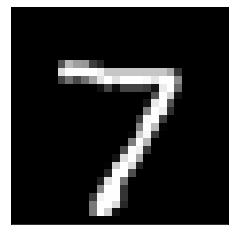

Inference label: 7
Ground truth label: 7
------------------------------
n = 2


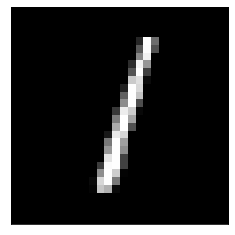

Inference label: 1
Ground truth label: 1
------------------------------
n = 3


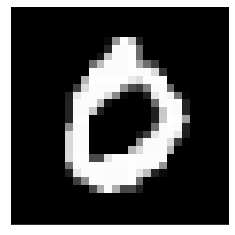

Inference label: 0
Ground truth label: 0
------------------------------
n = 8


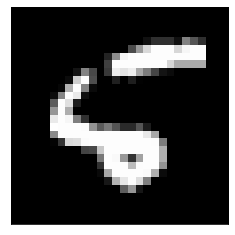

Inference label: 5
Ground truth label: 5
------------------------------
n = 9


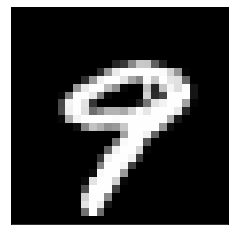

Inference label: 9
Ground truth label: 9
------------------------------
n = 10


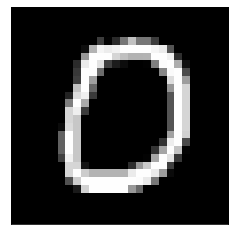

Inference label: 0
Ground truth label: 0
------------------------------
n = 11


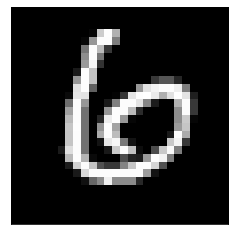

Inference label: 6
Ground truth label: 6
------------------------------
n = 12


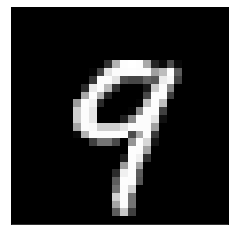

Inference label: 9
Ground truth label: 9
------------------------------
n = 13


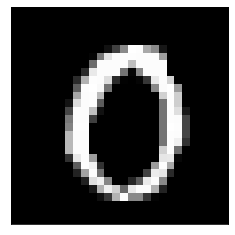

Inference label: 0
Ground truth label: 0
------------------------------
n = 14


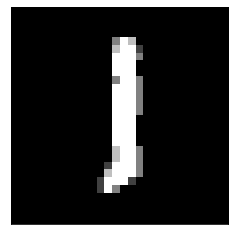

Inference label: 1
Ground truth label: 1
------------------------------
n = 15


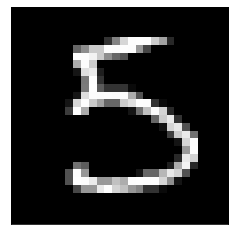

Inference label: 5
Ground truth label: 5
------------------------------
n = 16


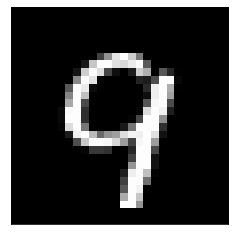

Inference label: 9
Ground truth label: 9
------------------------------
n = 15


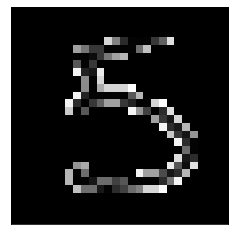

Inference label: 5
Ground truth label: 5
------------------------------
n = 16


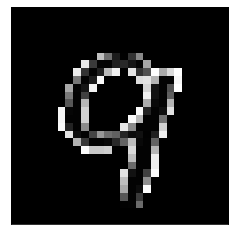

Inference label: 9
Ground truth label: 9
------------------------------
n = 17


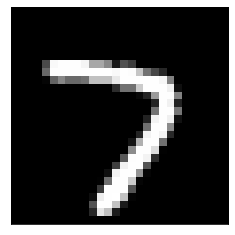

Inference label: 7
Ground truth label: 7
------------------------------
n = 18


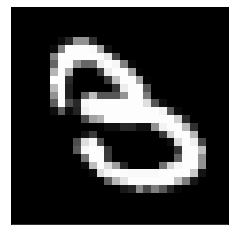

Inference label: 3
Ground truth label: 3
------------------------------
n = 19


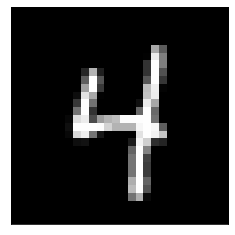

Inference label: 4
Ground truth label: 4
------------------------------
n = 90


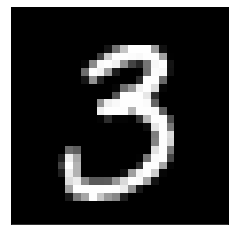

Inference label: 3
Ground truth label: 3
------------------------------
n = 50


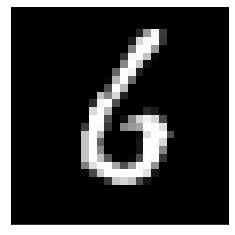

Inference label: 6
Ground truth label: 6
------------------------------
n = 56


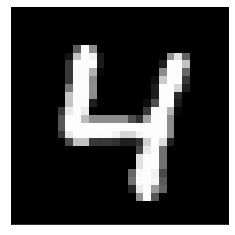

Inference label: 4
Ground truth label: 4
------------------------------
n = 47


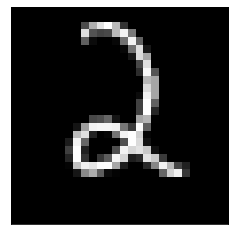

Inference label: 2
Ground truth label: 2
------------------------------
n = 36


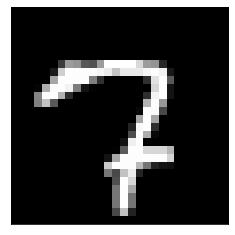

Inference label: 7
Ground truth label: 7
------------------------------
n = 51


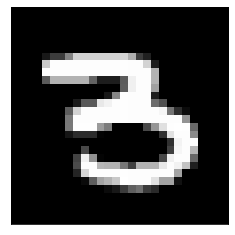

Inference label: 3
Ground truth label: 3
------------------------------
n = 37


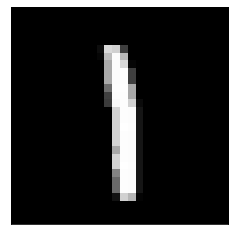

Inference label: 1
Ground truth label: 1
------------------------------
n = 500


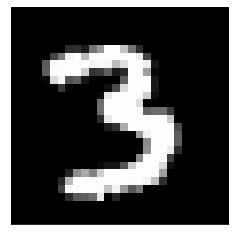

Inference label: 3
Ground truth label: 3
------------------------------
n = 79


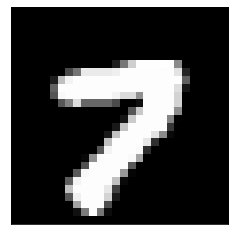

Inference label: 7
Ground truth label: 7
------------------------------
n = 1965


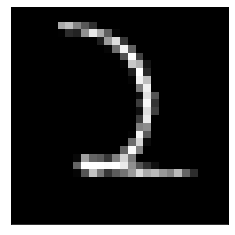

Inference label: 2
Ground truth label: 2
------------------------------
n = 1966


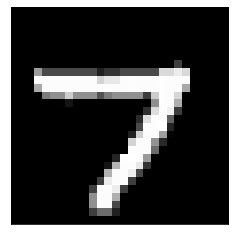

Inference label: 7
Ground truth label: 7
------------------------------
n = 353


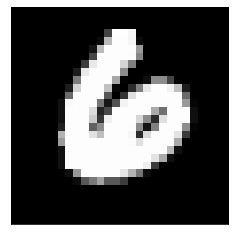

Inference label: 6
Ground truth label: 6
------------------------------
n = 232


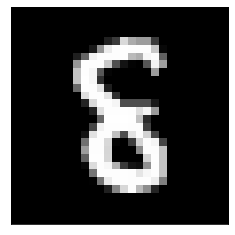

Inference label: 8
Ground truth label: 8
------------------------------
n = 

KeyboardInterrupt: Interrupted by user

In [41]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import load_model
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(-1, 28, 28, 1) / 255
y_test = keras.utils.to_categorical(y_test, 10)

model_test = load_model('MNIST_Arranged_model.h5') 

### Plot testing data
def plot(a):
    a *= 255
    a = a.astype(np.uint8)
    return a.reshape(28, 28)

while True:
    print("n = ", end = '')
    n = int(input())
    ax = plt.subplot()
    plt.imshow(plot(x_test[n]), cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

    ### Print inference results corresponding to the image we plot
    prediction = model_test.predict(x_test[n].reshape(-1, 28, 28, 1))
    print("Inference label: {}".format(np.argmax(prediction, axis = 1)[0]))
    print("Ground truth label: {}".format(np.argmax(y_test[n], axis = 0))) 
    print('------------------------------')
        # y_test[n] is one-hot-encoded, use np.argmax to decode

## Predict Images from Homemade MNIST

Select file: 8-2


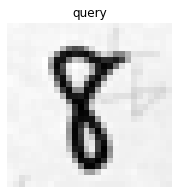

Inference label: 8
Ground truth label: 8
Certainty: 100.0%
----------------------
Select file: 8-6


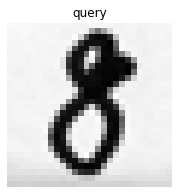

Inference label: 8
Ground truth label: 8
Certainty: 100.0%
----------------------
Select file: 8-4


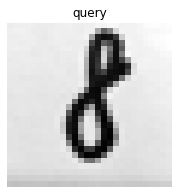

Inference label: 8
Ground truth label: 8
Certainty: 100.0%
----------------------
Select file: 9-4


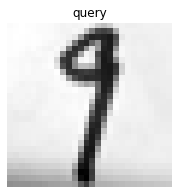

Inference label: 1
Ground truth label: 9
Certainty: 70.99999785423279%
----------------------
Select file: 9-3


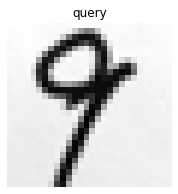

Inference label: 8
Ground truth label: 9
Certainty: 100.0%
----------------------
Select file: 

KeyboardInterrupt: Interrupted by user

In [43]:
import numpy as np
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import load_model

arr_plot = []
def predict(filename):
    img = Image.open(filename).convert('L')
    img = img.resize((3089, 3090))
    if img.size[0] != 28 or img.size[1] != 28:
        img = img.resize((28, 28))
    arr = []
    for i in range(28):
        for j in range(28):
            # The value from 0 to 1 means the color from white to black
            pixel = 1.0 - float(img.getpixel((j, i))) / 255.0
            # pixel = 255.0 - float(img.getpixel((j, i))) 
            if pixel < 0.3:
                arr.append(0.0)
            else:
                arr.append(1.0)
    arr_plot = np.array(arr).reshape(28, 28) * 255
    arr_plot = arr_plot.astype(np.uint8)
    arr1 = np.array(arr).reshape(1, 28, 28, 1)
    prediction = model_test.predict(arr1)
    return prediction


def showimg(filename, title, i):
    img = Image.open(filename).convert('L')
    img = img.resize((3089, 3090))
    if img.size[0] != 28 or img.size[1] != 28:
        img = img.resize((28, 28))
    im_list = np.asarray(img)
    plt.subplot(1, 3, i)
    plt.title(title)
    plt.axis('off')
    plt.imshow(im_list, cmap = 'gray')
    
model_test = load_model('MNIST_Arranged_model.h5') 

while True:
    print("Select file: ", end = '')
    s = input()
    filename = 'C:/Users/user/.keras/datasets/homemadeMNIST/' + s + '.jpg'
    plt.figure(figsize = (10, 10))
    showimg(filename, 'query', 1)
    plt.show()
    prediction = predict(filename)
    print("Inference label: {}".format(np.argmax(prediction, axis = 1)[0]))
    print("Ground truth label: {}".format(filename[44])) 
    print("Certainty: {}%".format(round(np.max(prediction), 2) * 100))
    print('----------------------')


## Validation Loss of Predicting Homemade MNIST

In [40]:
import numpy as np
from PIL import Image
from keras.preprocessing import image
from keras.models import load_model

def predict(filename):
    img = Image.open(filename).convert('L')
    img = img.resize((3089, 3090))
    if img.size[0] != 28 or img.size[1] != 28:
        img = img.resize((28, 28))
    arr = []
    for i in range(28):
        for j in range(28):
            # The value from 1 to 0 means the color from white to black
            pixel = float(img.getpixel((j, i))) / 255.0
            # pixel = 255.0 - float(img.getpixel((j, i))) 
            if pixel < 0.3:
                arr.append(1.0)
            else:
                arr.append(0.0)
    arr1 = np.array(arr).reshape(1, 28, 28, 1)
    prediction = model_test.predict(arr1)
    return prediction

model_test = load_model('MNIST_Arranged_model.h5') 

base = 'C:/Users/user/.keras/datasets/homemadeMNIST/'
loss = []
certainty = []
sumloss = 0
sumcertainty = 0
imax = 10
jmax = 13
for i in range(imax):
    loss.append(0)
    certainty.append(0)
    for j in range(jmax):
        filename = base + str(i) + '-' + str(j) + '.jpg'
        prediction = predict(filename)
        residuals = np.argmax(prediction, axis = 1)[0] != int(filename[44])
        loss[i] += residuals
        rate = np.max(prediction)
        certainty[i] += rate
    print('Loss of digit {}: {}%'.format(i, round(loss[i] / jmax * 100, 2)), end = '    ')
    print('Certainty of digit {}: {}%'.format(i, round(certainty[i] / jmax * 100, 2)))
    sumloss += loss[i] / jmax
    sumcertainty += certainty[i] / jmax
print('Average Accuracy: {}%'.format(round((1 - sumloss / imax) * 100, 2)))
print('Average Loss: {}%'.format(round(sumloss / imax * 100, 2)))
print('Average Certainty: {}%'.format(round(sumcertainty / imax * 100, 2)))


Loss of digit 0: 15.38%    Certainty of digit 0: 90.84%
Loss of digit 1: 46.15%    Certainty of digit 1: 86.78%
Loss of digit 2: 38.46%    Certainty of digit 2: 96.01%
Loss of digit 3: 15.38%    Certainty of digit 3: 89.37%
Loss of digit 4: 38.46%    Certainty of digit 4: 91.29%
Loss of digit 5: 23.08%    Certainty of digit 5: 95.95%
Loss of digit 6: 23.08%    Certainty of digit 6: 90.66%
Loss of digit 7: 15.38%    Certainty of digit 7: 82.09%
Loss of digit 8: 15.38%    Certainty of digit 8: 91.94%
Loss of digit 9: 84.62%    Certainty of digit 9: 87.21%
Average Accuracy: 68.46%
Average Loss: 31.54%
Average Certainty: 90.21%
